**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# <font color='#0C509E' style='font-size: 40px;'>Regressão Linear - Múltiplas variáveis</font>

## 1. Explorando o Dataset

Este dataset apresenta dados coletados de startups de New York, California e Florida.

**Dataset:** https://www.kaggle.com/farhanmd29/50-startups

### 1.1. Importando o Dataset

In [3]:
df = pd.read_csv('../datasets/50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.columns = ['P&D', 'Administracao', 'Marketing', 'Estado', 'Lucro']
df.head()

,P&D,Administracao,Marketing,Estado,Lucro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 1.2. Informações básicas do dataset

In [6]:
print(f'O dataset possui {df.shape[0]} exemplos/amostras/linhas e {df.shape[1]} atributos/variáveis/colunas')

O dataset possui 50 exemplos/amostras/linhas e 5 atributos/variáveis/colunas


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   P&D            50 non-null     float64
 1   Administracao  50 non-null     float64
 2   Marketing      50 non-null     float64
 3   Estado         50 non-null     object 
 4   Lucro          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<br/>**"Lucro"** é uma _variável dependente_ e todas as demais são _variáveis independentes_.

### 1.3. Estatísticas Descritivas

In [8]:
df.describe()

,P&D,Administracao,Marketing,Lucro
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


0 P&D
1 Administracao
2 Marketing
3 Lucro


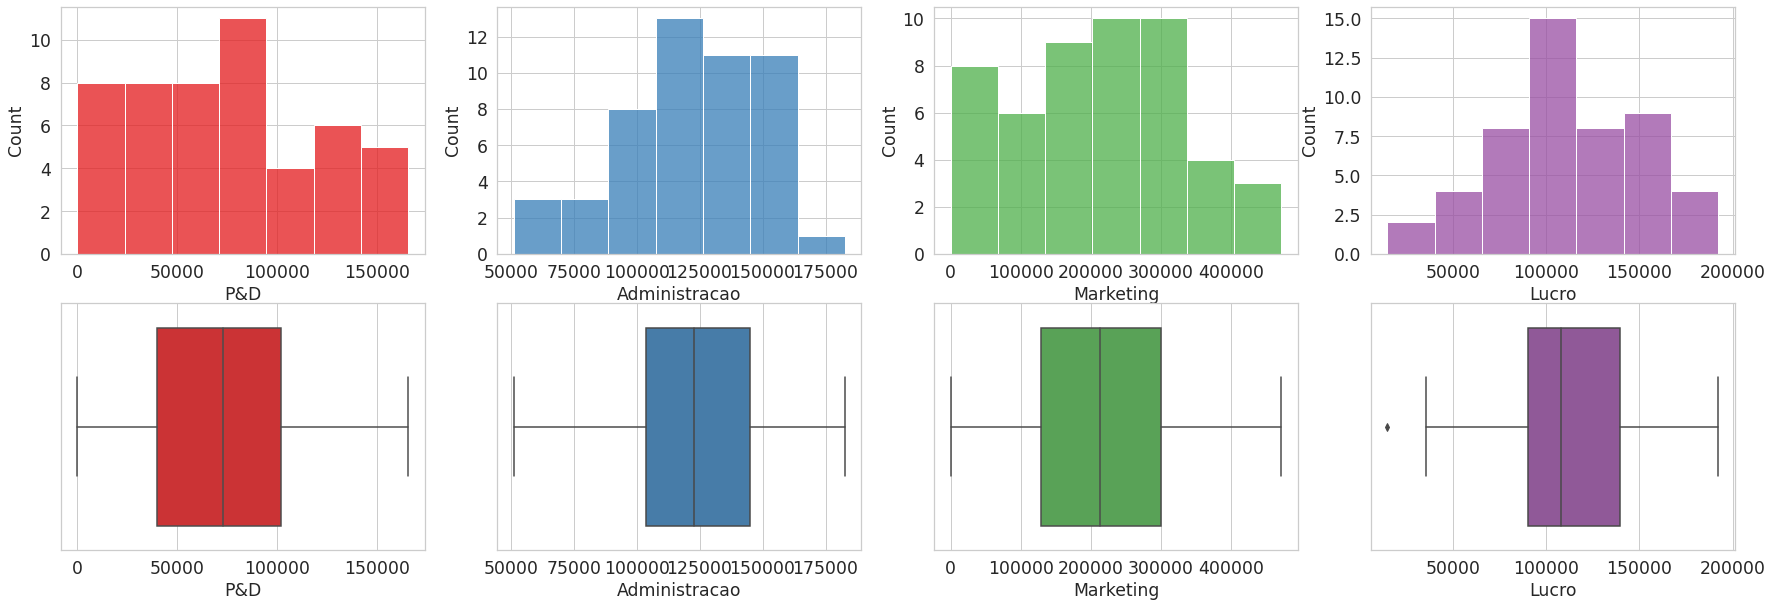

In [9]:
import matplotlib.cm as cm
cmap = cm.get_cmap('Set1').colors # color map

fig, axes = plt.subplots(2, 4, figsize=(30,10))

atributos = ['P&D', 'Administracao', 'Marketing', 'Lucro']

for i, atributo in enumerate(atributos):
    print(i, atributo)
    sns.histplot(data=df, x=atributo, color=cmap[i], ax=axes[0, i])
    sns.boxplot(data=df, x=atributo, color=cmap[i], ax=axes[1, i])


## 2. Analisando os Estados (Variável Categórica)

### 2.1. Proporção de observações por Estado

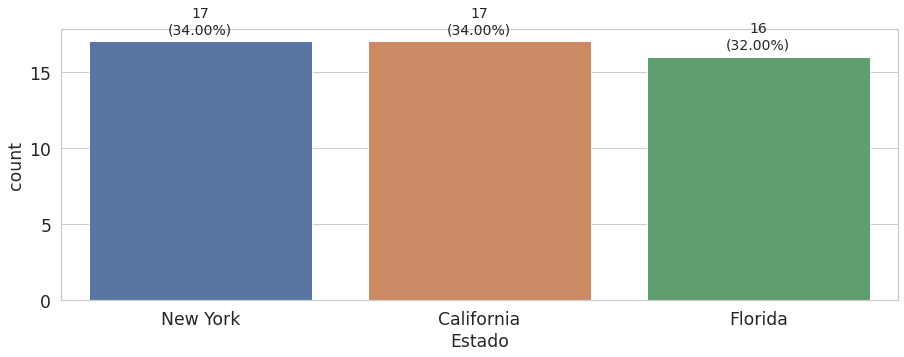

In [10]:
ax = sns.countplot(data=df, x='Estado')

n_registros = df.shape[0]

for bar in ax.patches:
    freq = bar.get_height()
    ax.annotate(f'{freq}\n({(freq * 100) / n_registros:.2f}%)',  # string a ser impressa
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # posição inicial a ser impressa (x, y)
                ha='center', va='center',
                size=14, xytext=(0, 20),
                textcoords='offset points')

In [11]:
df.groupby('Estado').size()

Estado
California    17
Florida       16
New York      17
dtype: int64

### 2.2. Lucro médio (e desvio padrão) por Estado

<AxesSubplot:xlabel='Estado', ylabel='Lucro'>

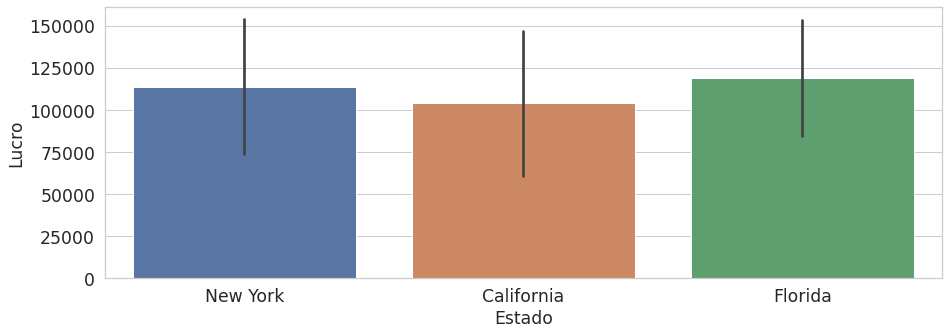

In [12]:
sns.barplot(data=df, x='Estado', y='Lucro', ci='sd')

In [13]:
df.groupby('Estado')['Lucro'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Estado,,,,,,,,
California,17.0,103905.18,44446.36,14681.40,78239.91,97427.84,134307.35,191792.06
Florida,16.0,118774.02,35605.47,49490.75,99147.92,109543.12,142719.63,191050.39
New York,17.0,113756.45,41140.26,35673.41,96479.51,108552.04,129917.04,192261.83


### 2.3. Distribuição dos Lucros por Estado

<AxesSubplot:xlabel='Lucro', ylabel='Estado'>

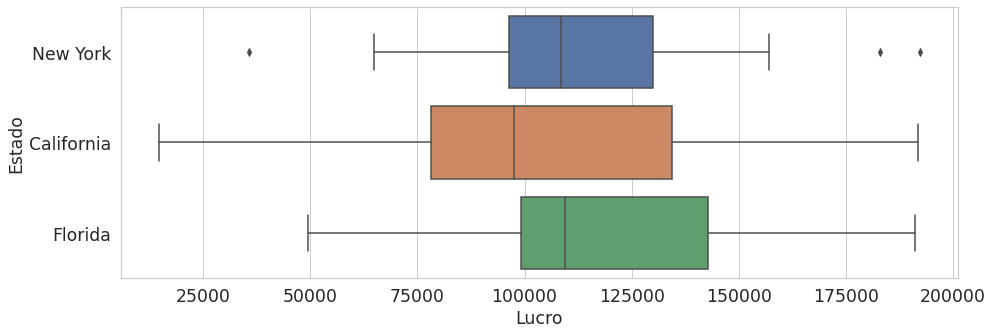

In [14]:
sns.boxplot(data=df, x='Lucro', y='Estado')

### 2.4. Matriz de correlação

O **coeficiente de correlação** é uma medida que mede a associação linear entre duas variáveis. Seu valor varia de **_-1_** (associação negativa perfeita) e **_+1_** (associação positiva perfeita).
<img src="../imgs/correlation_coefficient.png" width="70%" />

Fonte: https://dataz4s.com/statistics/correlation-coefficient/

In [15]:
df.corr()

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.241955,0.724248,0.972900
Administracao,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Lucro,0.972900,0.200717,0.747766,1.000000


<br/>Note que a correlação entre o **Lucro** e os investimentos em **P&D** é bem alta. Em uma escala menor, a correlação entre o **Lucro** e os investimentos em **Marketing** também é expressiva.

#### Correlação por Estado

In [16]:
df.groupby('Estado').corr()

P&D  Administracao  Marketing     Lucro
Estado                                                                
California P&D            1.000000       0.193109   0.742708  0.975064
           Administracao  0.193109       1.000000  -0.090714  0.161666
           Marketing      0.742708      -0.090714   1.000000  0.794036
           Lucro          0.975064       0.161666   0.794036  1.000000
Florida    P&D            1.000000       0.053469   0.545440  0.970117
           Administracao  0.053469       1.000000  -0.353783 -0.041762
           Marketing      0.545440      -0.353783   1.000000  0.569445
           Lucro          0.970117      -0.041762   0.569445  1.000000
New York   P&D            1.000000       0.406806   0.803902  0.976410
           Administracao  0.406806       1.000000   0.144562  0.398472
           Marketing      0.803902       0.144562   1.000000  0.810238
           Lucro          0.976410       0.398472   0.810238  1.000000

<br/>

A correlação entre o **Lucro** e os investimentos em **P&D** é bem alta.<br/>
A correlação entre o **Lucro** e os investimentos em **Administração** não é expressiva, sendo perto de zero, o que sugere que tais variáveis não são correlatas.<br/>
A correlação entre o **Lucro** e os investimentos em **Marketing** é consideravelmente alta.<br/>

<br/>

A correlação entre o **Lucro** e os investimentos em **P&D** também é bem alta na _Florida_.<br/>
A correlação entre o **Lucro** e os investimentos em **Administração** não é expressiva, sendo perto de zero, o que sugere que tais variáveis não são correlatas.<br/>
A correlação entre o **Lucro** e os investimentos em **Marketing** é menor do que na _California_, mas ainda indica uma certa correlação entre as duas variáveis.<br/>

<br/>

A correlação entre o **Lucro** e os investimentos em **P&D** também é bem alta.<br/>
Diferente da _California_ e _Florida_, os invesimentos em **Aministração** parecem ter uma certa influência no **Lucro** das empresas de NY, uma vez que a correlação de tais variáveis é "relativamente" expressiva.<br/>
A correlação entre o **Lucro** e os investimentos em **Marketing** é consideravelmente alta.<br/>

### 2.5. Variável Dependente (y) vs Variáveis Independentes/Explicativas

## `pairplot`

Plota o relacionamento entre pares de variáveis em um dataset.

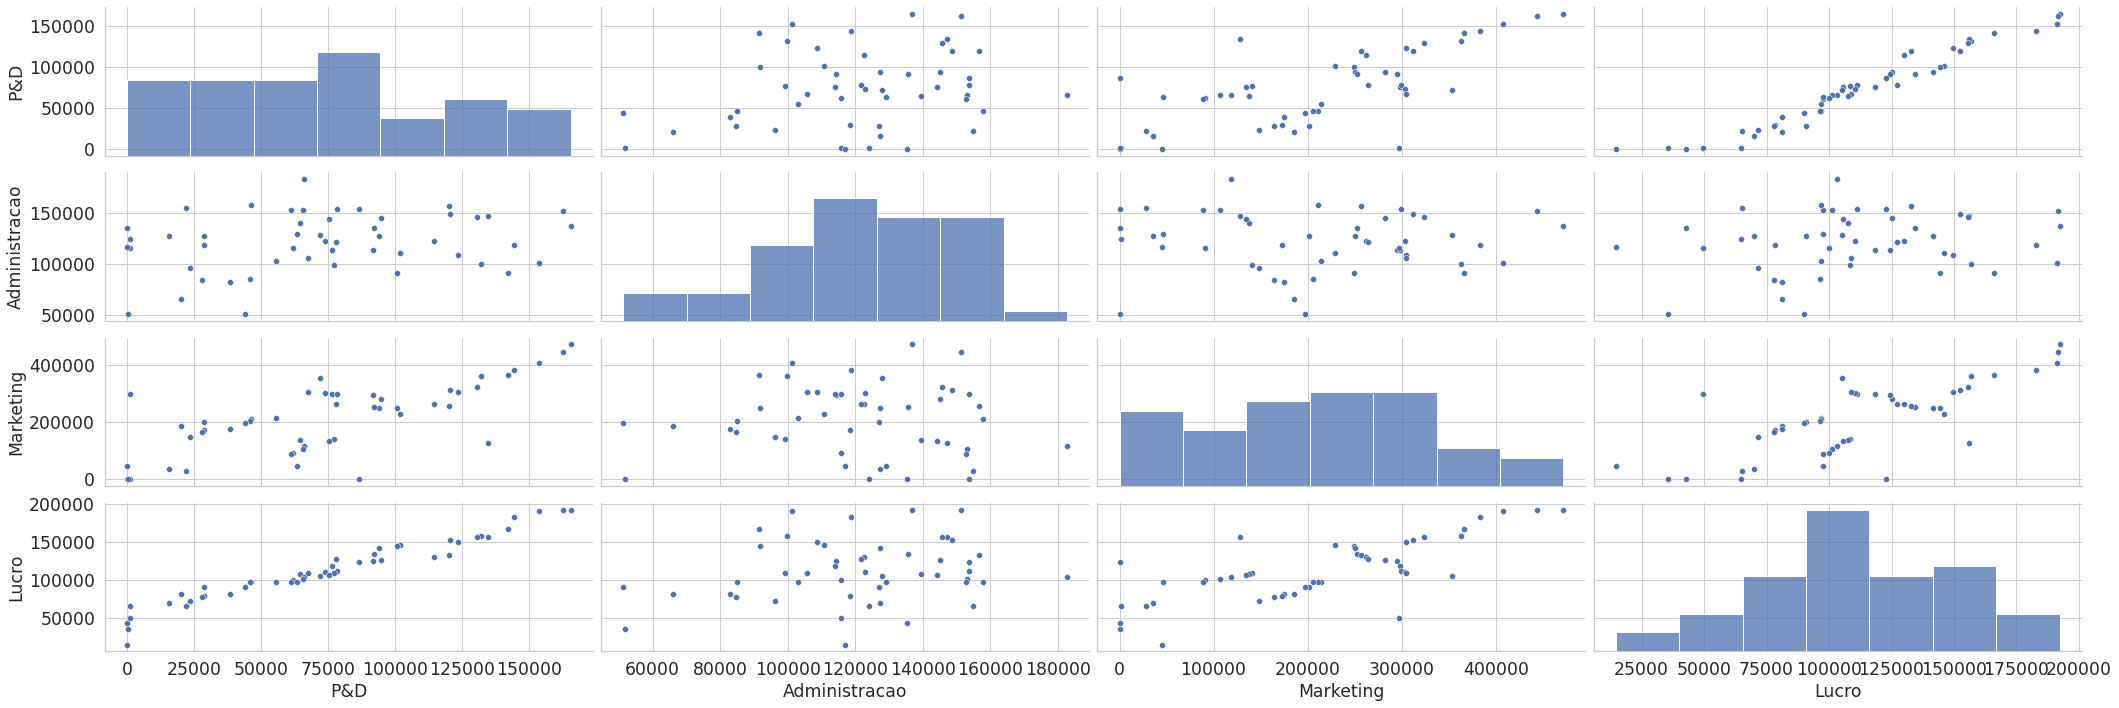

In [17]:
sns.pairplot(df, aspect=3)

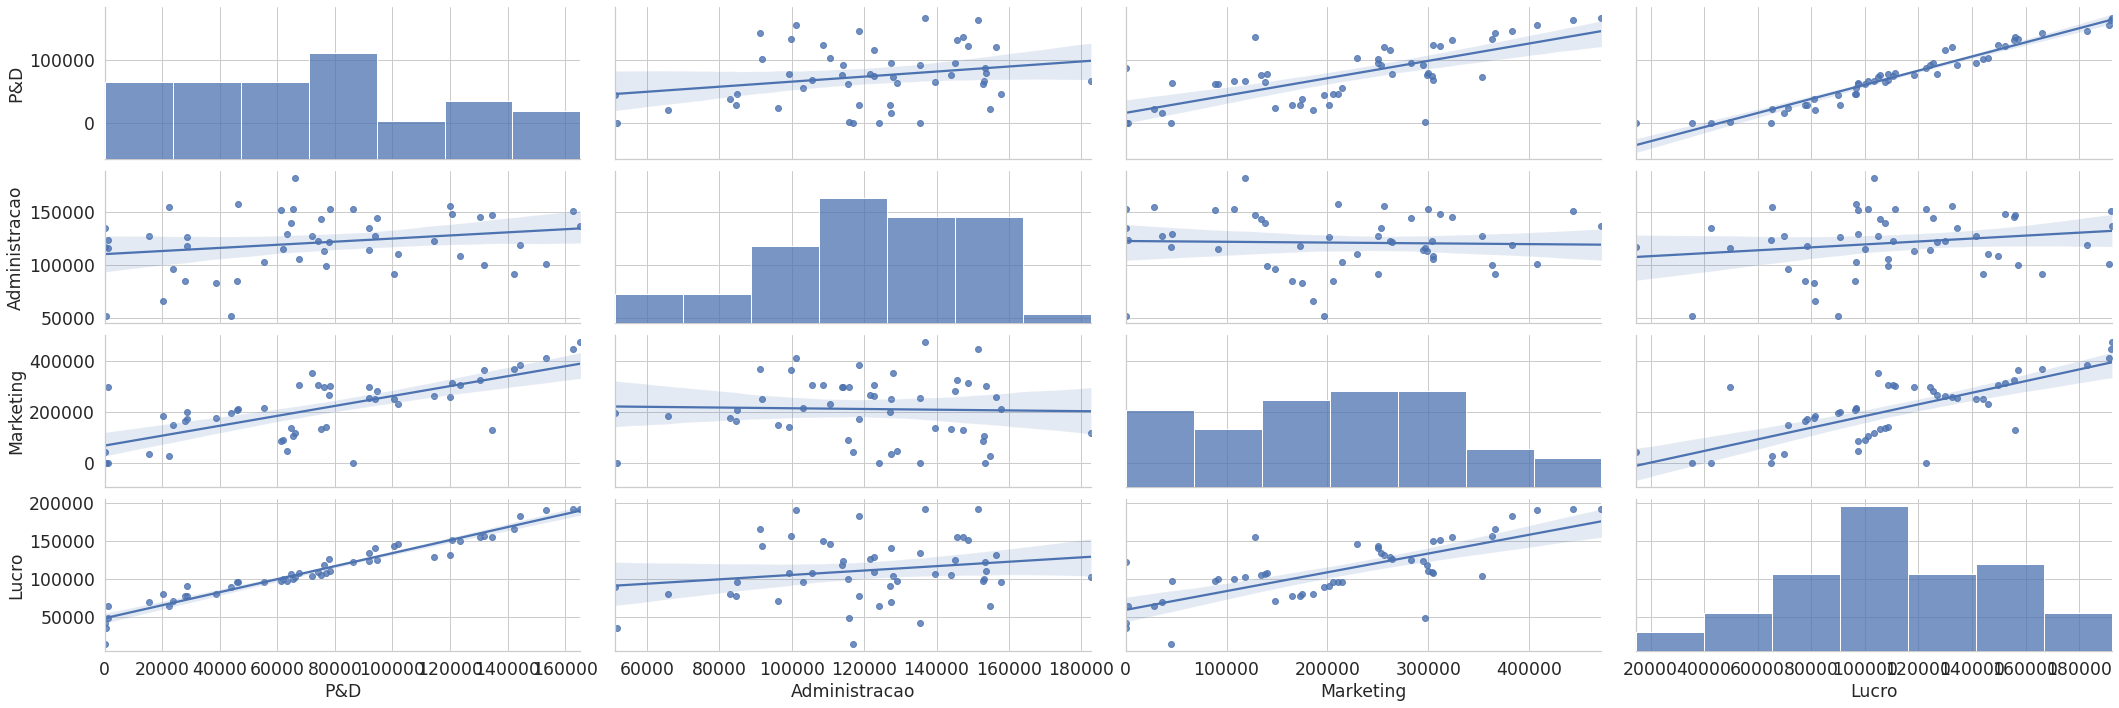

In [18]:
sns.pairplot(df, kind='reg', aspect=3)

## `jointplot`
Plota o relacionamento entre duas variáveis e suas respectivas distribuições de frequência.

## `lmplot`
Plota a reta de regressão entre duas variáveis juntamente com suas respectivas dispersões.

### 2.6. Visualizando a Variável Dependente e 2 Variáveis Independentes

In [19]:
df.corr()

,P&D,Administracao,Marketing,Lucro
P&D,1.000000,0.241955,0.724248,0.972900
Administracao,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Lucro,0.972900,0.200717,0.747766,1.000000


In [21]:
#!pip install plotly
#!jupyter labextension install jupyterlab-plotly

#import plotly.express as px

#fig = px.scatter_3d(df, x='P&D', y='Marketing', z='Lucro', width=1000, height=500)
#fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
#fig.show()

## 4. Estimando um modelo linear

A **regressão linear** é uma abordagem para modelar o relacionamento entre variáveis independentes (explicativas) e dependentes numéricas, ajustando um modelo linear (p. ex., uma reta) para as observações de um conjunto treinamento.

Tal modelo linear é usado para a prever variáveis dependentes numéricas a partir das variáveis independentes de novas observações (ainda não vistas).

### 4.1. Transformando variáveis categóricas em Variáveis _Dummy_

In [22]:
df.head()

,P&D,Administracao,Marketing,Estado,Lucro
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df_pre = pd.get_dummies(data=df, columns=['Estado'])

In [24]:
df_pre.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Alternativa: OneHotEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

##### Pros x Cons

1. Com o **_OneHotEnconder_**, podemos criar uma _função/modelo_ para criar as **dummy variables** a partir de nosso **conjunto de treinamento**. Podemos então aplicar tal modelo para novos dados, sem nenhum problema.

2. Com o **_OneHotEnconder_**, se o **conjunto de teste** possuir valores **NÃO** vistos no **conjunto de treinamento** para a _varável categórica_ a ser transformada em **dummy**, podemos informar a ação que desejamos tomar. Basta passarmos o parâmetro: handle_unknown{‘error’, ‘ignore’}. Isso é extremamente interessante quando já temos modelos treinados em produção, de modo que valores não suportados deverão ser identificados antes do uso do modelo.

No caso do ***get_dummies()***, precisaremos ter todos os dados de **treinamento e teste** na mesma tabela, a fim de mantermos a consistência da criação das variáveis dummy – p. ex: A coluna Estado_California deverá vir antes de Estado_Florida e Estado_New York – o que resolveria o caso (1). Tal junção também resolveria o caso (2), uma vez que a função criaria uma nova coluna para **todo novo valor** para a variável categórica. <br/>
Mas, note que isso limita seu uso em _PRODUÇÃO_, com modelos já treinados para um dado conjunto de valores categóricos, exigindo um retreinamento do modelo para todo novo conjunto de teste.

Fonte: https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki

### 4.2. Evitando o Dummy Variable Trap

In [25]:
df_final = df_pre.drop(columns=['Estado_New York'])

In [26]:
df_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [27]:
### Alternativamente
pd.get_dummies(data=df, columns=['Estado'], drop_first=True)

,P&D,Administracao,Marketing,Lucro,Estado_Florida,Estado_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


### 4.3. Extraindo as variáveis independentes e dependentes

#### Criando um DataFrame para armazenar as variáveis independentes/explicativas (X)

In [28]:
df_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [32]:
df_final.columns

Index(['P&D', 'Administracao', 'Marketing', 'Lucro', 'Estado_California',
       'Estado_Florida'],
      dtype='object')

In [33]:
variaveis_independentes = ['P&D', 'Administracao', 'Marketing', 'Estado_California', 'Estado_Florida']
variaveis_independentes

['P&D', 'Administracao', 'Marketing', 'Estado_California', 'Estado_Florida']

In [34]:
X = df_final[variaveis_independentes]
X.head()

,P&D,Administracao,Marketing,Estado_California,Estado_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


#### Criando uma Series para armazenar a variável dependente (y)

In [35]:
y = df_final['Lucro']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Lucro, dtype: float64

### 4.4. Dividindo o dataset em Conjunto de Treinamento e Conjunto de Teste

In [36]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [39]:
X.shape

(50, 5)

In [40]:
X_train.shape, y_train.shape

((40, 5), (40,))

In [41]:
X_test.shape, y_test.shape

((10, 5), (10,))

### 4.5. Verificando os tamanhos dos conjuntos de treino e teste

In [42]:
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')

X_train.shape = (40, 5), y_train.shape = (40,)


In [43]:
print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

X_test.shape = (10, 5), y_test.shape = (10,)


### 4.6. Treinando o modelo de Regressão Linear Simples com o Conjunto de Treinamento

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
regressor = LinearRegression()

In [47]:
# Treinamento do modelo de regressão linear
regressor.fit(X_train, y_train)

LinearRegression()

### 4.7. Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

### Coeficiente de Determinação - R²

O coeficiente de determinação (R²) é uma medida resumida que diz quanto a linha de regressão ajusta-se aos dados. <br/>
Ele expressa a **quantidade da variância dos dados** que é explicada pelo modelo linear. <br/>
P. ex: R² = 0.7512 significa que o modelo linear explica 75.12% da variância da variável dependente a partir do regressores (variáveis independentes) incluídas naquele modelo linear.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [48]:
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.9501847627493607


## 5. Predizendo os Lucros para as Amostras/Exemplos de Teste

In [49]:
X_test.head()

,P&D,Administracao,Marketing,Estado_California,Estado_Florida
28,66051.52,182645.56,118148.20,0,1
11,100671.96,91790.61,249744.55,1,0
10,101913.08,110594.11,229160.95,0,1
41,27892.92,84710.77,164470.71,0,1
2,153441.51,101145.55,407934.54,0,1


In [50]:
y_pred = regressor.predict(X_test)

In [51]:
y_pred

array([103015.20159776, 132582.27760831, 132447.73845184,  71976.09851266,
       178537.4822107 , 116161.24230157,  67851.69209689,  98791.73374679,
       113969.43533008, 167921.06569569])

In [54]:
resultados = pd.DataFrame({
    'Predição': y_pred,
    'Real': y_test,
    'Erro Absoluto': abs(y_test - y_pred)
})

In [55]:
resultados.round(2)

,Predição,Real,Erro Absoluto
28,103015.20,103282.38,267.18
11,132582.28,144259.40,11677.12
10,132447.74,146121.95,13674.21
41,71976.10,77798.83,5822.73
2,178537.48,191050.39,12512.91
27,116161.24,105008.31,11152.93
38,67851.69,81229.06,13377.37
31,98791.73,97483.56,1308.17
22,113969.44,110352.25,3617.19
4,167921.07,166187.94,1733.13


### Visualizando os Erros

In [58]:
resultados['Erro Absoluto'].describe().round(2)

count       10.00
mean      7514.29
std       5481.10
min        267.18
25%       2204.14
50%       8487.83
75%      12303.96
max      13674.21
Name: Erro Absoluto, dtype: float64

<AxesSubplot:ylabel='Erro Absoluto'>

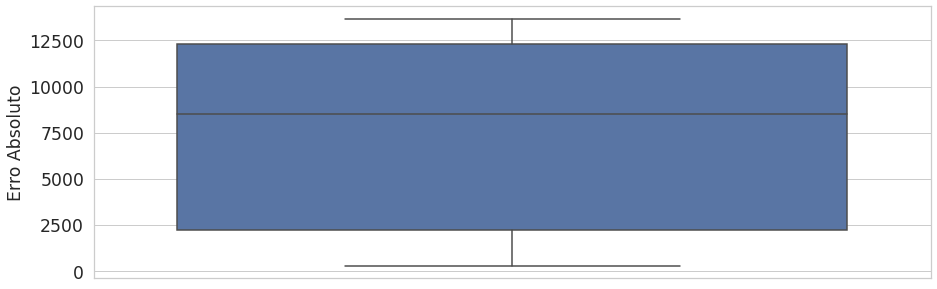

In [56]:
sns.boxplot(data=resultados, y='Erro Absoluto')

## 6. Medindo a "Acurácia" das Predições  - Métricas de Erro para Regressão

### Mean Absolute Error (MAE)
$$MAE = \frac{\sum_{i=1}^{n}|y_i - \hat{y}_i|}{n}$$

In [59]:
resultados['Erro Absoluto'].mean()

7514.293659597114

In [60]:
from sklearn.metrics import mean_absolute_error

In [62]:
MAE = mean_absolute_error(y_test, y_pred) #y_test == y_true
MAE

7514.293659597114

### Mean Squared Error (MSE)
$$MSE = \frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n}$$

Uma vez que os **erros** são elevados ao quadrado antes do cômputo do _erro médio_, o MSE dá maior peso para **erros grandes**, do que o MAE.

In [64]:
(resultados['Erro Absoluto'] ** 2).mean()

83502864.03096965

In [65]:
from sklearn.metrics import mean_squared_error

In [67]:
MSE = mean_squared_error(y_test, y_pred)
MSE

83502864.03096965

### Root Mean Squared Error (RMSE)
$$RMSE = \sqrt{MSE} = \sqrt{\frac{\sum_{i=1}^{n}(y_i-\hat{y}_i)^2}{n}}$$

Está é a métrica comumente usada para comparar modelos de regressão.

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html

In [68]:
np.sqrt((resultados['Erro Absoluto'] ** 2).mean())

9137.990152706976

In [69]:
np.sqrt(MSE)

9137.990152706976

In [70]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)
RMSE

9137.990152706976

## 7. Interpretação dos Coeficientes Estimados

<img src="../imgs/interpretacao_dos_coeficientes.png" width=700/>

### 7.1. Intercepto do modelo
O **intercepto** do modelo representa o _efeito médio_ em $Y$ (Lucro) tendo todas as variáveis independentes zeradas (excluídas do modelo). Como $x_4=x_5=0$, este cenário consiste do Estado da _California_. Portanto, o coeficiente de regressão para _California_ estará incluso no **intercepto** (veremos mais jajá).

In [71]:
regressor.intercept_

43253.53667068365

### 7.2. Coeficientes de regressão
Os **coeficientes de regressão (hiperplano)** $b_1$, $b_2$, $b_3$, $b_4$ e $b_5$ são conhecidos como **coeficientes parciais de regressão** ou **coeficientes parciais angulares**. Em outras palavras:
- $b_1$ mede a variação no valor médio de $Y$ (Lucro), por unidade de variação em $x_1$ (P&D), mantendo-se os valores de $x_2$ (Administração), $x_3$ (Marketing), $x_4$ (Florida) e $x_5$ (New York) constantes.

Ele nos dá o _efeito "direto"_ de uma unidade de variação em $x_1$ sobre o valor médio de $Y$, excluídos os efeitos que as demais variáveis independentes possam ter sobre a média de $Y$.

De modo análogo podemos interpretar os demais coeficientes de regressão.

In [72]:
regressor.coef_

array([ 7.73467193e-01,  3.28845975e-02,  3.66100259e-02, -6.99369053e+02,
       -1.65865321e+03])

In [73]:
X.columns

Index(['P&D', 'Administracao', 'Marketing', 'Estado_California',
       'Estado_Florida'],
      dtype='object')

In [76]:
pd.DataFrame({
    'Feature': X.columns,
    'Coeficiente': regressor.coef_
})

,Feature,Coeficiente
0,P&D,0.773467
1,Administracao,0.032885
2,Marketing,0.036610
3,Estado_California,-699.369053
4,Estado_Florida,-1658.653213


### 7.3. Interpretação dos Coeficientes Estimados

- **Intercepto → Excluindo o efeito das _variáveis independentes_** <br/>
($x_2=x_3=x_4=x_5=0$), o efeito médio no Lucro das startups seria de **\$ 42554.16**. Ao assumir $x_4=x_5=0$, estamos assumindo que o _Estado_ é a _California_. Assim, o coeficiente de regressão para _California_ está incluso neste **intercepto**. Se tivessemos mais variáveis categóricas que foram transformadas em variáveis _dummy_, todas as variáveis _dummy_ excluídas da tabela teriam seus coeficientes de regressão inclusos no **intercepto**.

- **P&D** → Mantendo-se os valores das outras _variáveis independentes_ **constantes**, o acréscimo de **$ 1 de investimento em P&D** gera uma variação média no Lucro das startups de **\$ 0.773467**.

- **Administração** → Mantendo-se os valores das outras _variáveis independentes_ **constantes**, o acréscimo de $ 1 de investimento em Administração gera uma variação média no Lucro das startups de **\$ 0.032885**.

*- *Marketing** → Mantendo-se os valores das outras _variáveis independentes_ **constantes**, o acréscimo de $ 1 de investimento em Marketing gera uma variação média no Lucro das startups de **\$ 0.036610**.

- **Startups na Florida** → Mantendo-se os valores das outras _variáveis independentes_ **constantes**, o fato da startup estar na Florida gera uma variação média no Lucro das startups de **\$ -959.284160**.
    
- **Startups em New York** → Mantendo-se os valores das outras _variáveis independentes_ **constantes**, o fato da startup estar em New York gera uma variação média no Lucro das startups de **\$ 699.369053**.

- **Startups na California** → Mesmo caso do _Intercepto_.

## 8. O LinearRegression do `sklearn` já trata o Dummy Variable Trap?

In [ ]:
df_pre.head()

### 8.1. Obtendo os novos X e y

In [ ]:
variaveis_independentes = df_pre.columns.to_list()
variaveis_independentes.remove('Lucro')
variaveis_independentes

In [ ]:
X_dummy_trap = df_pre[variaveis_independentes]
X_dummy_trap.head()

In [ ]:
y_dummy_trap = df_pre[variavel_dependente]
y_dummy_trap.head()

In [ ]:
X.head()

In [ ]:
X_dummy_trap.head()

In [ ]:
y.head()

In [ ]:
y_dummy_trap.head()

### 8.2. Dividindo o conjunto em Treinamento e Teste

In [ ]:
test_size = 0.2  # taxa de amostras/exemplos que serão amostras de teste ==> neste caso, 20%

X_dummy_trap_train, X_dummy_trap_test, y_dummy_trap_train, y_dummy_trap_test = train_test_split(X_dummy_trap, y_dummy_trap, test_size=test_size, random_state=0)

In [ ]:
X_train.head()

In [ ]:
X_dummy_trap_train.head()

In [ ]:
y_train.head()

In [ ]:
y_dummy_trap_train.head()

### 8.3. Treinando o modelo de Regressão Linear sem tratar o Dummy Variable Trap

In [ ]:
regressor_dummy_trap = LinearRegression()
regressor_dummy_trap.fit(X_dummy_trap_train, y_dummy_trap_train)  # fit == ajustar

### 8.4. Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

### Coeficiente de Determinação - R²

In [ ]:
print(f'R² = {regressor_dummy_trap.score(X_dummy_trap_train, y_dummy_trap_train)}')

In [ ]:
print(f'R² = {regressor.score(X_train, y_train)}')

### 8.5. Predizendo os Lucros para as Amostras/Exemplos de Teste

In [ ]:
y_dummy_trap_pred = regressor_dummy_trap.predict(X_dummy_trap_test)

## 8.6. Erros - Métricas

In [ ]:
MSE_dummy_trap = mean_squared_error(y_dummy_trap_test, y_dummy_trap_pred)
MSE_dummy_trap

In [ ]:
MSE

<br/>

Tudo levar a crer que o modelo de **Regressão Linear** do _Scikit-learn_ já trate a **_dummy variable trap_**. Porém, não achei nenhuma documentação oficial que falasse isso.

## 9. _Overfitting:_ Sobreajustando nosso modelo

É um termo usado em estatística para descrever quando um modelo estatístico se **ajusta muito bem** ao conjunto de dados de trainamento, utilizados para treinar o modelo, mas se mostra _ineficaz_ para prever novos resultados não-vistos ==> **não generaliza para novos dados**.

## 9.1. Treinando um modelo de regressão linear com pouquíssimas amostras

### 9.1.1. Extraindo o conjunto de Treino e Teste

In [77]:
df_final.head()

,P&D,Administracao,Marketing,Lucro,Estado_California,Estado_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [78]:
X  # obtido em passos anteriores - sem o atributo 'Lucro'

,P&D,Administracao,Marketing,Estado_California,Estado_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1
5,131876.90,99814.71,362861.36,0,0
6,134615.46,147198.87,127716.82,1,0
7,130298.13,145530.06,323876.68,0,1
8,120542.52,148718.95,311613.29,0,0
9,123334.88,108679.17,304981.62,1,0


In [79]:
y  # obtido em passos anteriores - atributo 'Lucro'

0     192261.83
1     191792.06
2     191050.39
3     182901.99
4     166187.94
5     156991.12
6     156122.51
7     155752.60
8     152211.77
9     149759.96
10    146121.95
11    144259.40
12    141585.52
13    134307.35
14    132602.65
15    129917.04
16    126992.93
17    125370.37
18    124266.90
19    122776.86
20    118474.03
21    111313.02
22    110352.25
23    108733.99
24    108552.04
25    107404.34
26    105733.54
27    105008.31
28    103282.38
29    101004.64
30     99937.59
31     97483.56
32     97427.84
33     96778.92
34     96712.80
35     96479.51
36     90708.19
37     89949.14
38     81229.06
39     81005.76
40     78239.91
41     77798.83
42     71498.49
43     69758.98
44     65200.33
45     64926.08
46     49490.75
47     42559.73
48     35673.41
49     14681.40
Name: Lucro, dtype: float64

In [80]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, train_size=0.1, random_state=0)

In [81]:
X2_train

,P&D,Administracao,Marketing,Estado_California,Estado_Florida
46,1315.46,115816.21,297114.46,0,1
3,144372.41,118671.85,383199.62,0,0
0,165349.20,136897.80,471784.10,0,0
47,0.00,135426.92,0.00,1,0
44,22177.74,154806.14,28334.72,1,0


In [82]:
y2_train

46     49490.75
3     182901.99
0     192261.83
47     42559.73
44     65200.33
Name: Lucro, dtype: float64

In [83]:
X2_test

,P&D,Administracao,Marketing,Estado_California,Estado_Florida
28,66051.52,182645.56,118148.20,0,1
11,100671.96,91790.61,249744.55,1,0
10,101913.08,110594.11,229160.95,0,1
41,27892.92,84710.77,164470.71,0,1
2,153441.51,101145.55,407934.54,0,1
27,72107.60,127864.55,353183.81,0,0
38,20229.59,65947.93,185265.10,0,0
31,61136.38,152701.92,88218.23,0,0
22,73994.56,122782.75,303319.26,0,1
4,142107.34,91391.77,366168.42,0,1


In [84]:
y2_test

28    103282.38
11    144259.40
10    146121.95
41     77798.83
2     191050.39
27    105008.31
38     81229.06
31     97483.56
22    110352.25
4     166187.94
33     96778.92
35     96479.51
26    105733.54
34     96712.80
18    124266.90
7     155752.60
14    132602.65
45     64926.08
48     35673.41
29    101004.64
15    129917.04
30     99937.59
32     97427.84
16    126992.93
42     71498.49
20    118474.03
43     69758.98
8     152211.77
13    134307.35
25    107404.34
5     156991.12
17    125370.37
40     78239.91
49     14681.40
1     191792.06
12    141585.52
37     89949.14
24    108552.04
6     156122.51
23    108733.99
36     90708.19
21    111313.02
19    122776.86
9     149759.96
39     81005.76
Name: Lucro, dtype: float64

### 9.1.2. Treinando o modelo de Regressão Linear

In [85]:
regressor2 = LinearRegression()
regressor2.fit(X2_train, y2_train)

LinearRegression()

### 9.1.3. Coeficiente de determinação (R²) do modelo linear estimado com o Conjunto de Treinamento

### Coeficiente de Determinação - R²

In [86]:
print(f'R² = {regressor2.score(X2_train, y2_train)}')

R² = 1.0


In [87]:
print(f'R² = {regressor.score(X_train, y_train)}')

R² = 0.9501847627493607


## 9.2. Predizendo amostras de teste

In [88]:
y2_pred = regressor2.predict(X2_test)

## 9.3. Métricas de Acurácia

### 9.3.1 RMSE

In [89]:
RMSE2 = mean_squared_error(y2_test, y2_pred, squared=False)
RMSE2

35713.52903565315

In [90]:
RMSE # usando um conjunto de treinamento de 80% da base

9137.990152706976

### 9.3.2. MAE

In [91]:
MAE2 = mean_absolute_error(y2_test, y2_pred)
MAE2

30919.538933855394

In [92]:
MAE

7514.293659597114

### Soluções

1. Se o conjunto de dados é pequeno, aplique alguma técnica de Cross-validation (p. ex., k-fold) para evitar Overfitting durante seus experimentos
2. Obtenha mais dados representativos para o problemas, aumentando, assim, seu conjunto de treinamento.

## 10. Exercício: Comparando com outros modelos

Escolha outro conjunto de variáveis independentes (p. ex., ignore os investimentos em _Administração_) e treine outro modelo linear com o mesmo conjunto de treinamento. Compute as métricas de acurácia para o mesmo conjunto de teste e as compare com os resultados de usar todos as variáveis disponíveis.